# Vehicle's Market Price - EDA

This is the **E**xploratory **D**ata **A**nalysis for the vehicle's market price dataset. In this analysis, we are going to analyze the different variables of the model in relation to the vehicle's prices for a better understanding of the dataset.

Here are the steps of the analysis:

### Step 1 - Packages

In [1]:
import pandas as pd
import altair as alt
import pandas_profiling
from vega_datasets import data

In [2]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Step 2 - Data loading

For this model we are using a dataset of vehicle prices downloaded from Austin Reese's public repository in [kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data).

In [4]:
vehicles = pd.read_csv("../data/vehicles.csv").drop(columns = ['description', 'county'])
vehicles = vehicles.rename(columns = {"lat": "latitude", "long": "longitude"})

### Step 3 - Dataset head

In [5]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,transmission,vin,drive,size,type,paint_color,image_url,state,latitude,longitude
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,ut,40.3744,-104.694


### Step 4 - Data Description

In this dataset we have 17 categorical variables and 7 numerical variables, with the following description:

**Categorical variables:**
- `URL`: The url of the listing on Craiglist
- `Region`: Region where the listing was posted
- `region_url`: Craiglist's Region URL 
- `manufacturer`: Vehicle manufacturer
- `model`: Vehicle model
- `condition`: Vehicle condition according to the user (eg. 'excellent', 'like new')
- `cylinders`: Number of cylinders of the vehicle
- `fuel`: Vehicle fuel type
- `title_status`: Status of the vehicle (eg. 'rebuilt', 'clean')
- `transmission`: Transmission of the vehicle
- `vin`: VIN number of the vehicle
- `drive`: type of drive of the vehicle (eg. '4wd', 'fwd')
- `size`: Size of the vehicle
- `type`: Type of the vehicle (eg. 'SUV', 'pickup', 'sedan')
- `paint_color`: Color of the paint of the vehicle
- `image_url`: URL of the picture of the vehicle
- `state`: State where the listing is posted

**Numerical variables:**
- `id`: id of the listing
- `year`: vehicle's manufacturing year
- `price`: **Response**, price of the vehicle
- `odometer`: Mileage of the vehicle at the moment the listing was posted
- `latitude`: Latitude of the state
- `longitude`: Longitude of the state

The following code shows the variables and their non-null count

In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 23 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
state           509577 non-null object
latitude        499285 non-null float64
longitude       499285 non-nul

In order to explore the numerical variables, we used the pd.describe() function. Here we can observe that the maximum market price is $360'000.000 USD.

In [10]:
vehicles.describe()

,id,price,year,odometer,latitude,longitude
count,5.095770e+05,5.095770e+05,508050.000000,4.172530e+05,499285.000000,499285.000000
mean,7.044176e+09,5.479684e+04,2009.662236,1.017300e+05,38.453818,-94.313886
std,4.937219e+06,9.575025e+06,8.567953,1.073790e+05,5.902152,17.717653
min,6.995212e+09,0.000000e+00,1900.000000,0.000000e+00,-82.688100,-165.935000
25%,7.040802e+09,3.995000e+03,2007.000000,4.948800e+04,34.557400,-108.506000
50%,7.045325e+09,9.377000e+03,2011.000000,9.489400e+04,39.145300,-88.678800
75%,7.048556e+09,1.795500e+04,2015.000000,1.387780e+05,42.449000,-81.111400
max,7.050103e+09,3.600029e+09,2021.000000,1.000000e+07,81.569300,94.124800


You can see that the dataset contains prices that are bigger than what you expect from an used car's market price. During a closer revision, we realized these outliers are scrapping errors. Hence, we are going to remove these values to improve the EDA.

In [12]:
price_99 = vehicles.price.quantile(0.99)
vehicles = vehicles.query('price < @price_99')

Now it looks a bit better

In [14]:
vehicles.describe()

,id,price,year,odometer,latitude,longitude
count,5.044740e+05,504474.000000,503142.000000,4.129280e+05,494226.000000,494226.000000
mean,7.044174e+09,11940.038266,2009.640914,1.023395e+05,38.455053,-94.253831
std,4.936873e+06,10306.756649,8.482819,1.073156e+05,5.899346,17.704063
min,6.995212e+09,0.000000,1900.000000,0.000000e+00,-82.688100,-165.935000
25%,7.040801e+09,3995.000000,2007.000000,5.057275e+04,34.571300,-108.051750
50%,7.045322e+09,8999.000000,2011.000000,9.545800e+04,39.145900,-88.517000
75%,7.048556e+09,17500.000000,2015.000000,1.390625e+05,42.448000,-81.088200
max,7.050103e+09,49995.000000,2021.000000,1.000000e+07,81.569300,94.124800


In addition, we analyzed the frequency of the levels of the categorical variables

In [15]:
numeric_features = ['year', 'odometer']
categorical_features = ['state','manufacturer','model', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'size', 'type', 'paint_color']

In [16]:
for feat in categorical_features:
    print('Feature: %s' %(feat))
    print('------------')
    print(f'This feature has {len(vehicles[feat].unique())} levels')
    print('------------')
    print(vehicles[feat].value_counts())
    print('\n\n')

Feature: state
------------
This feature has 51 levels
------------
ca    51992
fl    34919
tx    29228
ny    22266
mi    20933
oh    19230
nc    19177
or    19069
pa    15475
wa    15376
wi    14929
tn    13789
va    12915
co    12584
il    11731
ia    11247
nj    10170
id     9910
mn     9829
ma     9528
sc     8821
az     8459
al     8253
mt     7980
ga     7394
in     7317
ar     7089
ks     7011
mo     6706
ct     6634
ok     6606
ky     5836
md     5146
la     4389
nm     4182
ak     3824
nv     2986
nh     2958
me     2953
ri     2953
vt     2947
dc     2943
hi     2938
ne     2616
ms     2494
sd     2291
wv     1615
ut     1592
de     1393
wy     1050
nd      801
Name: state, dtype: int64



Feature: manufacturer
------------
This feature has 44 levels
------------
ford               91276
chevrolet          72984
toyota             38107
nissan             26388
ram                25926
honda              25574
jeep               23856
gmc                22755
dodge           

### Step 5 - Data Visualizations

#### Correlations

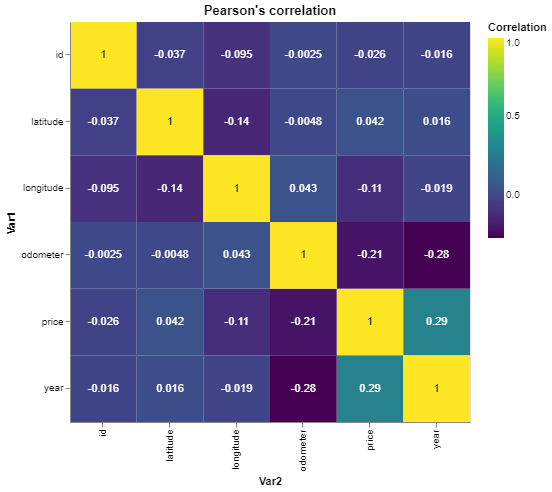

In [17]:
vehicles_corr = vehicles.corr().reset_index().rename(columns = {'index':'Var1'}).melt(id_vars = ['Var1'],
                                                                                    value_name = 'Correlation',
                                                                                    var_name = 'Var2')
base = alt.Chart(vehicles_corr).encode(
    alt.Y('Var1:N'),
    alt.X('Var2:N')
) 

heatmap = base.mark_rect().encode(
     alt.Color('Correlation:Q',
                scale=alt.Scale(scheme='viridis'))
)

text = base.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.2'),
    color=alt.condition(
        alt.datum.Correlation >= 0.95,
        alt.value('black'),
        alt.value('white')
    )
)

(heatmap + text).properties(
    width = 400,
    height = 400,
    title = "Pearson's correlation"
)

#### Frequency map

In [26]:
vehicles['state'] = vehicles['state'].str.upper()
vehicles_position = vehicles.dropna(subset = ['latitude', 'longitude'])[['state','latitude', 'longitude','price', 'id']]

vehicles_position = vehicles_position.groupby(by = "state")\
                                     .agg({'price': 'mean',
                                          'longitude' : 'mean',
                                          'latitude' : 'mean',
                                          'id': 'count'})\
                                     .reset_index()

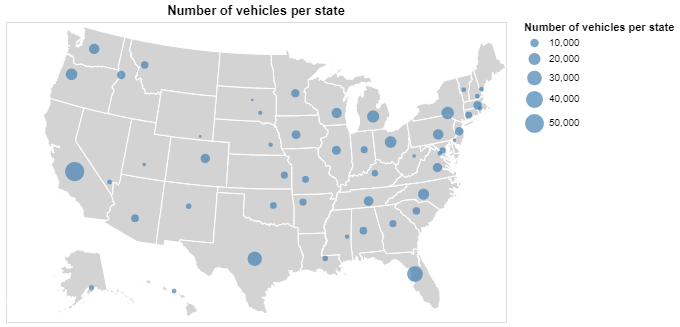

In [19]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(vehicles_position).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='sum(id)',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Number of vehicles per state'),
    color=alt.value('steelblue'),
    tooltip=[alt.Tooltip('state:N', title='state'), alt.Tooltip('count:Q', title='Price', format=',.2f')]
).properties(
    title='Number of vehicles per state'
)
background + points

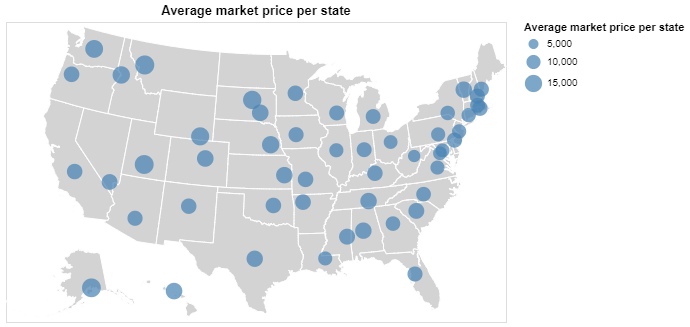

In [20]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(vehicles_position).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='sum(price)',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Average market price per state'),
    color=alt.value('steelblue'),
    tooltip=[alt.Tooltip('state:N', title='state'), alt.Tooltip('count:Q', title='Price', format='$,.2f')]
).properties(
    title='Average market price per state'
)
background + points

#### Market Price by Categorical Variables

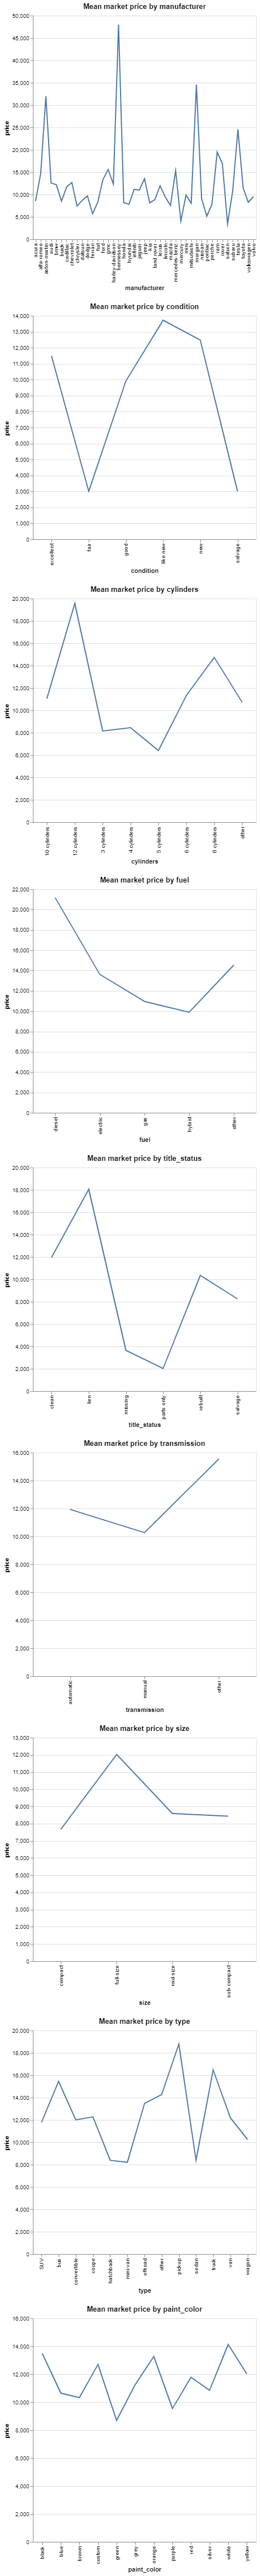

In [24]:
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'size', 'type', 'paint_color']

categorical_encodings = ['manufacturer', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'size', 'type', 'paint_color']

base = alt.Chart().mark_line().encode(
    alt.Y('price:Q')
).properties(
    width=400,
    height=400
)

chart = alt.vconcat()
for i in range(len(categorical_features)):
        vehicles_graph = vehicles[['price', categorical_features[i]]].groupby(by = categorical_features[i])\
                                                                     .mean()\
                                                                     .reset_index()
        row = alt.hconcat(data = vehicles_graph)
        row |= base.encode(alt.X(categorical_encodings[i])).properties(title = f'Mean market price by {categorical_features[i]}')
        
        chart &= row
        
chart    
